<hr style="border:2px solid black">

<h1><center>Final Project: Machine Learning</center></h1>

<hr style="border:2px solid black">

## 1. Your views about the problem statement?

<p>The problem statement is focused on building a regression model that predicts the salary of newly hired employees at TechWorks Consulting. This model will help streamline the company's hiring process by using past employee data and various influencing factors like college tier, city, role, previous CTC, and experience to estimate future salaries. The task is relevant and practical as it addresses real-world challenges in salary determination and ensures that compensation decisions are data-driven and fair, while maintaining efficiency. The project offers an opportunity to utilize various regression techniques and compare model performance to select the best one.</p>

<hr style="border:1px solid black">

## 2. What will be your approach to solving this task?

<p>My approach will follow these steps:

- Data Cleaning and Preprocessing: Handle missing data, convert categorical variables (like college tier, city, and role) into numerical values, and treat outliers if needed.
- Exploratory Data Analysis (EDA): Visualize relationships between features and the target variable (salary) to gain insights.
- Model Selection: Try multiple regression models (e.g., Linear Regression, Decision Trees, Random Forests, and Gradient Boosting) and compare their performance.
- Model Training: Split the data into training and testing sets, train each model, and evaluate using appropriate metrics like Mean Squared Error (MSE) and R-squared.
- Model Evaluation: Choose the best-performing model based on evaluation metrics and explain why it performed better than others.</p>

<hr style="border:1px solid black">

## 3. What were the available ML model options you had to perform this task?

<p>The available machine learning models for this task include:

- Linear Regression: A basic regression model that assumes a linear relationship between features and the target variable.
- Ridge and Lasso Regression: Regularized versions of linear regression that help prevent overfitting by penalizing large coefficients.
- Decision Tree Regressor: A non-linear model that uses decision trees to predict the target variable.
- Random Forest Regressor: An ensemble method that builds multiple decision trees and averages their results, improving accuracy and reducing overfitting.
- Gradient Boosting Regressor: Another ensemble method that sequentially builds models to correct errors made by the previous ones, enhancing prediction performance.
- XGBoost Regressor: An optimized version of gradient boosting that is faster and more efficient. It includes regularization techniques that reduce overfitting and has high flexibility to handle large datasets and complex patterns.
- KNeighbors Regressor: A simple, non-parametric model that predicts the target value based on the values of its nearest neighbors in the feature space. It works well with small datasets but can be sensitive to the choice of the number of neighbors and scales poorly with large datasets.</p>

<hr style="border:1px solid black">

## 4. Which model’s performance is best and what could be the possible reason for that?

<p>After comparing the performance of the different models, <b>Random Forest Regressor</b> typically provides the best results due to its ability to capture non-linear relationships between features and the target variable. It also mitigates overfitting by averaging the predictions of multiple trees. Additionally, Random Forest can handle both categorical and continuous data well, making it suitable for this problem where we have diverse features like college tier, city, and previous CTC. The ensemble nature of this model ensures it performs better than individual models like Linear Regression or Decision Trees.</p>

<hr style="border:1px solid black">

## 5. What steps can you take to improve this selected model’s performance even further?

<p>To improve the performance of the selected Random Forest model, the following steps can be taken:

- Hyperparameter Tuning: Use grid search or randomized search to fine-tune important parameters such as the number of trees, maximum depth, and minimum samples per leaf.
- Feature Scaling: Apply scaling techniques like normalization or standardization to ensure all features contribute equally to the prediction.</p>

#### Importing the Libraries

In [269]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor

#### Reading the files/data

In [271]:
df=pd.read_csv('C:/Data Science/ML_with_python/Final Project/ML case Study.csv',header=0)
college = pd.read_csv('C:/Data Science/ML_with_python/Final Project/Colleges.csv', header=0)
city = pd.read_csv('C:/Data Science/ML_with_python/Final Project/cities.csv', header=0)

In [273]:
df.head(50)  #Printing the first 50 rows to see how our data looks for the df dataframe

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10
5,IIIT Delhi,Kolhapur,Executive,54340.0,4,73,31,59950.89
6,"BMS College, Bangalore",Surat,Executive,60298.0,1,42,46,66602.34
7,LNMIIT,Delhi,Executive,49944.0,2,56,37,57768.44
8,"Dayanand College of Engineering, Bangalore",Chennai,Executive,53124.0,4,40,37,70083.30
9,NIT Tiruchipally (Trichy),Kolhapur,Executive,51141.0,1,47,60,85648.48


In [275]:
college.head(50)  #Printing the first 50 rows of college data

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus
5,IIT Roorkee,IIIT Lucknow,"KIIT, Bhubaneswar"
6,IIT Guwahati,MNNIT Allahabad,Amity University
7,IIIT Hyderabad,Punjab Engineering College,"BMS College, Bangalore"
8,BITS Pilani (Pilani Campus),DAIICT,"PES University, Bangalore"
9,IIT Indore,MNIT Jaipur,"USIT, Delhi"


In [277]:
# Converting college data into lists
Tier1= college['Tier 1'].tolist()
Tier2= college['Tier 2'].tolist()
Tier3= college['Tier 3'].tolist()

In [6]:
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

##### Removing the nan values

In [279]:
Tier1=[x for x in Tier1 if x==x]
print(Tier1)

['IIT Bombay', 'IIT Delhi', 'IIT Kharagpur', 'IIT Madras', 'IIT Kanpur', 'IIT Roorkee', 'IIT Guwahati', 'IIIT Hyderabad', 'BITS Pilani (Pilani Campus)', 'IIT Indore', 'IIT Ropar', 'IIT BHU (Varanasi)', 'IIT ISM Dhanbad', 'DTU', 'NSUT Delhi (NSIT)', 'NIT Tiruchipally (Trichy)', 'NIT Warangal', 'NIT Surathkal (Karnataka)', 'Jadavpur University', 'BITS Pilani (Hyderabad Campus)', 'BITS Pilani (Goa Campus)', 'IIIT Allahabad']


In [281]:
Tier2=[x for x in Tier2 if x==x]
print(Tier2)

['IIIT Bangalore', 'IIIT Delhi', 'IGDTUW', 'NIT Calicut', 'IIITM Gwalior', 'IIIT Lucknow', 'MNNIT Allahabad', 'Punjab Engineering College', 'DAIICT', 'MNIT Jaipur', 'NIT Durgapur', 'VNIT Nagpur', 'LNMIIT', 'BIT Mesra', 'SVNIT Surat', 'NIT Jalandhar', 'NIT Jamshedpur', 'NIT Kurukshetra', 'NIT Patna', 'NIT Raipur', 'NIT Bhopal', 'NIT Rourkela', 'NIT Silchar', 'NIT Sikkim', 'IIIT Jabalpur', 'Jalpaiguri Government Engineering College', 'IIEST/BESU Shibpur', 'R.V. College of Engineering']


In [283]:
Tier3=[x for x in Tier3 if x==x]
print(Tier3)

['Ramaiah Institute of Technology, Bengaluru', 'TIET/Thapar University', 'Manipal Main Campus', 'VIT Vellore', 'SRM Main Campus', 'KIIT, Bhubaneswar', 'Amity University', 'BMS College, Bangalore', 'PES University, Bangalore', 'USIT, Delhi', 'MAIT, Delhi', 'MSIT, Delhi', 'Dayanand College of Engineering, Bangalore', 'Heritage Institute of Technology, Kolkata', 'IEM, Kolkata', 'Techno India, Kolkata', 'Jaypee, Noida', 'Amrita University, Coimbatore', 'Cummins College of Engineering for Women, Pune']


##### Converting columns 'college, city and Role' in our df to respective categories

In [285]:
for item in Tier1:
    df["College"]=df["College"].replace(item,1)
for item in Tier2:
    df["College"]=df["College"].replace(item,2)
for item in Tier3:
    df["College"]=df["College"].replace(item,3)

C:\Users\shubh\AppData\Local\Temp\ipykernel_9556\1057453828.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["College"]=df["College"].replace(item,3)


In [287]:
df.head(50)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10
5,2,Kolhapur,Executive,54340.0,4,73,31,59950.89
6,3,Surat,Executive,60298.0,1,42,46,66602.34
7,2,Delhi,Executive,49944.0,2,56,37,57768.44
8,3,Chennai,Executive,53124.0,4,40,37,70083.30
9,1,Kolhapur,Executive,51141.0,1,47,60,85648.48


In [289]:
city.head(50)

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode
5,Hyderabad,Rajpur Sonarpur
6,Ahmedabad,Kolhapur
7,Pune,Ajmer
8,Surat,NaN


In [291]:
Metro_city=city['Metrio City'].tolist()
Nonmetro_city=city['non-metro cities'].tolist()

In [14]:
Metro_city

['Mumbai',
 'Delhi',
 'Kolkata',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Ahmedabad',
 'Pune',
 'Surat']

In [15]:
Nonmetro_city

['Dehradun',
 'Durgapur',
 'Asansol',
 'Rourkela',
 'Kozhikode',
 'Rajpur Sonarpur',
 'Kolhapur',
 'Ajmer',
 nan]

In [293]:
Nonmetro_city= [x for x in Nonmetro_city if x==x]
print(Nonmetro_city)

['Dehradun', 'Durgapur', 'Asansol', 'Rourkela', 'Kozhikode', 'Rajpur Sonarpur', 'Kolhapur', 'Ajmer']


In [295]:
for i in Metro_city:
    df['City']=df['City'].replace(i,1)
for i in Nonmetro_city:
    df['City']=df['City'].replace(i,0)


C:\Users\shubh\AppData\Local\Temp\ipykernel_9556\3542785392.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['City']=df['City'].replace(i,0)


In [297]:
df.head(50)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10
5,2,0,Executive,54340.0,4,73,31,59950.89
6,3,1,Executive,60298.0,1,42,46,66602.34
7,2,1,Executive,49944.0,2,56,37,57768.44
8,3,1,Executive,53124.0,4,40,37,70083.30
9,1,0,Executive,51141.0,1,47,60,85648.48


In [299]:
df['Role']= df['Role'].replace('Manager',1)
df['Role']= df['Role'].replace('Executive',0)

C:\Users\shubh\AppData\Local\Temp\ipykernel_9556\680606496.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Role']= df['Role'].replace('Executive',0)


In [301]:
df.head(50)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,1,55523.0,3,66,19,71406.58
1,2,0,0,57081.0,1,84,18,68005.87
2,3,0,0,60347.0,2,52,28,76764.02
3,3,0,0,49010.0,2,81,33,82092.39
4,1,0,0,57879.0,4,74,32,73878.10
5,2,0,0,54340.0,4,73,31,59950.89
6,3,1,0,60298.0,1,42,46,66602.34
7,2,1,0,49944.0,2,56,37,57768.44
8,3,1,0,53124.0,4,40,37,70083.30
9,1,0,0,51141.0,1,47,60,85648.48


#### Data Preprocessing

In [303]:
df.info() # getting a concise summary of the DataFrame, including the data types, non-null counts, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   int64  
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 99.4 KB


- From the above information we can interpret that the range index is 1589 and the non-null count in each column is 1589. Hence, there are no missing values

In [305]:
df.describe() # getting the stattistical description of our dataframe

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,0.206419,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,0.404862,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,0.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,0.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [307]:
df.duplicated().sum() #checking for duplicate values

46

In [309]:
df=df.drop_duplicates() #dropping the duplicate values

In [311]:
df.duplicated().sum()

0

In [313]:
df.shape

(1543, 8)

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1543 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1543 non-null   int64  
 1   City                 1543 non-null   int64  
 2   Role                 1543 non-null   int64  
 3   Previous CTC         1543 non-null   float64
 4   Previous job change  1543 non-null   int64  
 5   Graduation Marks     1543 non-null   int64  
 6   EXP (Month)          1543 non-null   int64  
 7   CTC                  1543 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 108.5 KB


#### Data Analysis

<Axes: xlabel='CTC', ylabel='Count'>

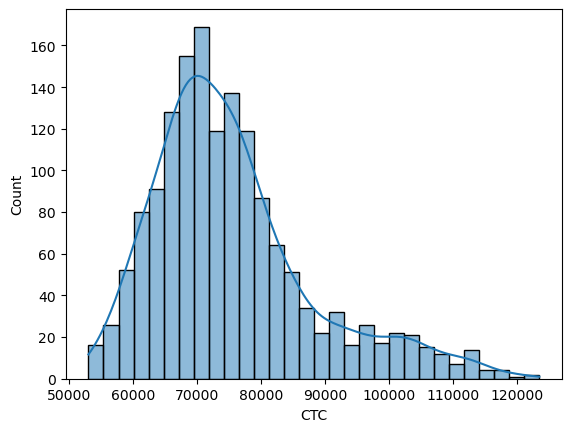

In [317]:
#Plot a histogram to undrestand how our target variable i.e CTC are distributed
sns.histplot(data=df,x=df.CTC,kde=True)

- Majoriy of people have salaries between <b>55k</b> to <b>90k</b>

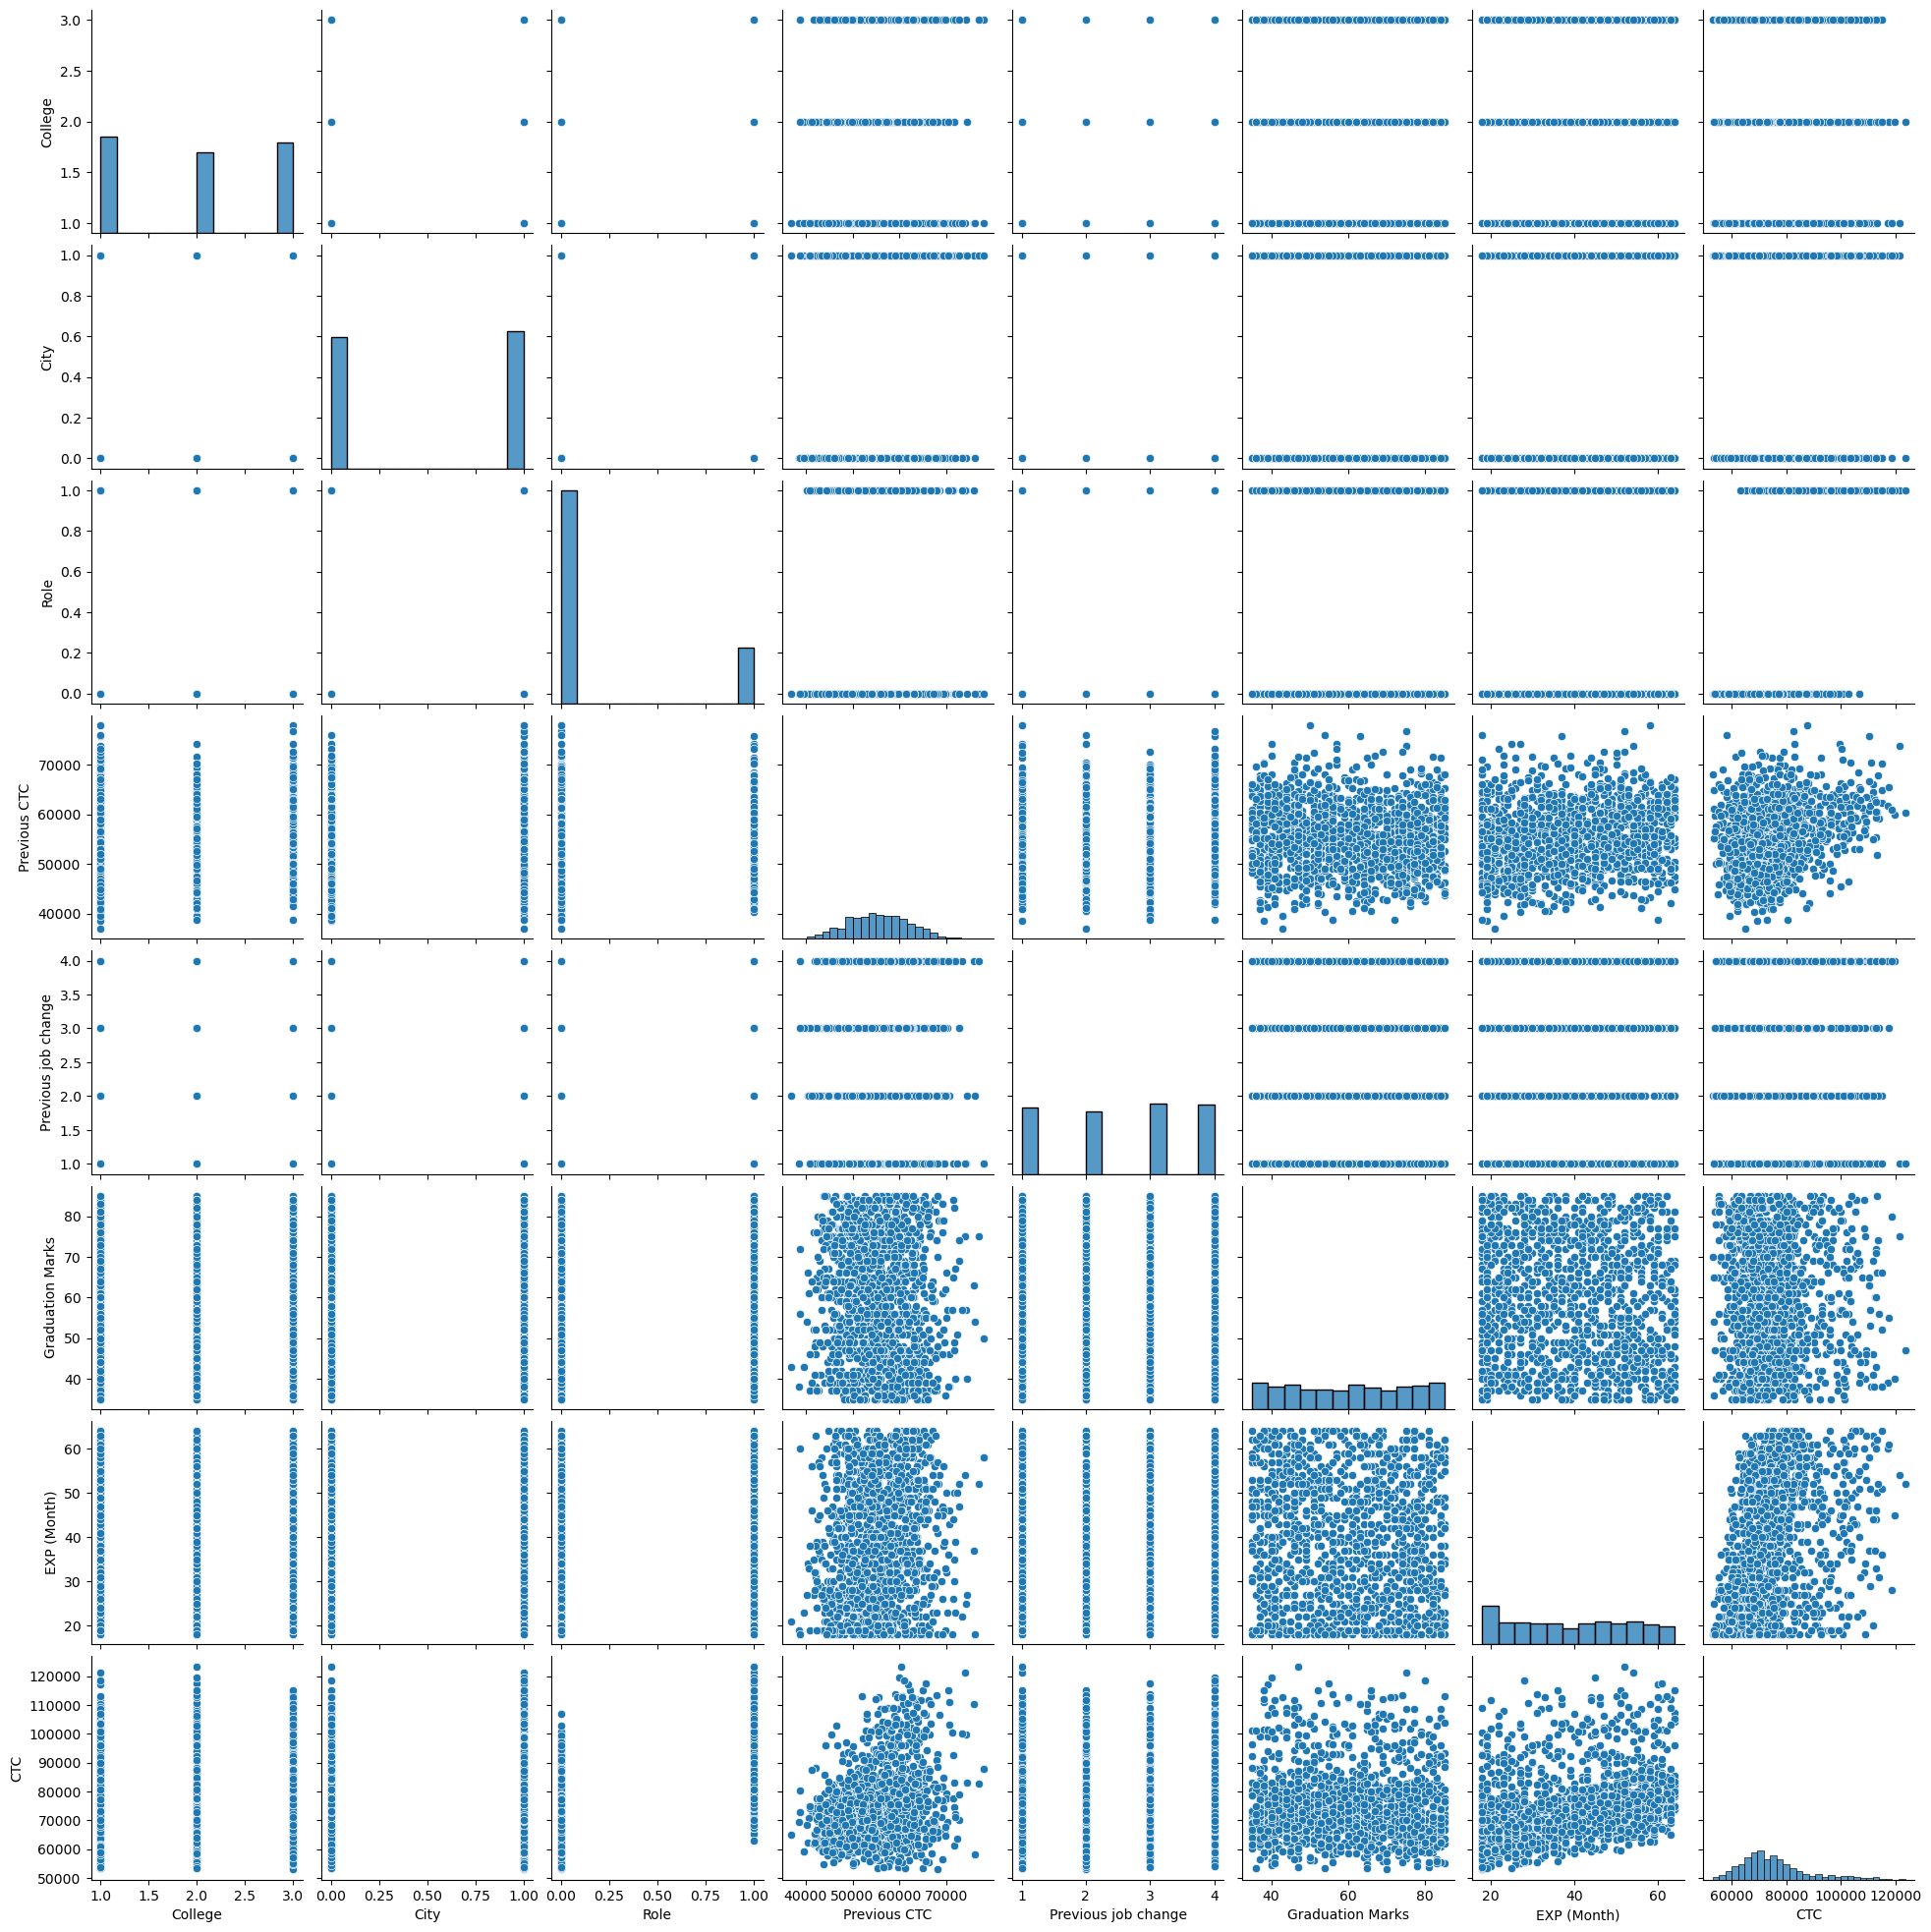

In [319]:
#Perform multivariate analysis to see how much do the variables relate to each other
sns.pairplot(data= df)

Through the above pairplot it is visible:
- There is clearly not a significant relationship between the independent variables
- We can notice outliers in the "Previous CTC' and 'CTC' values

#### Detecting Outliers

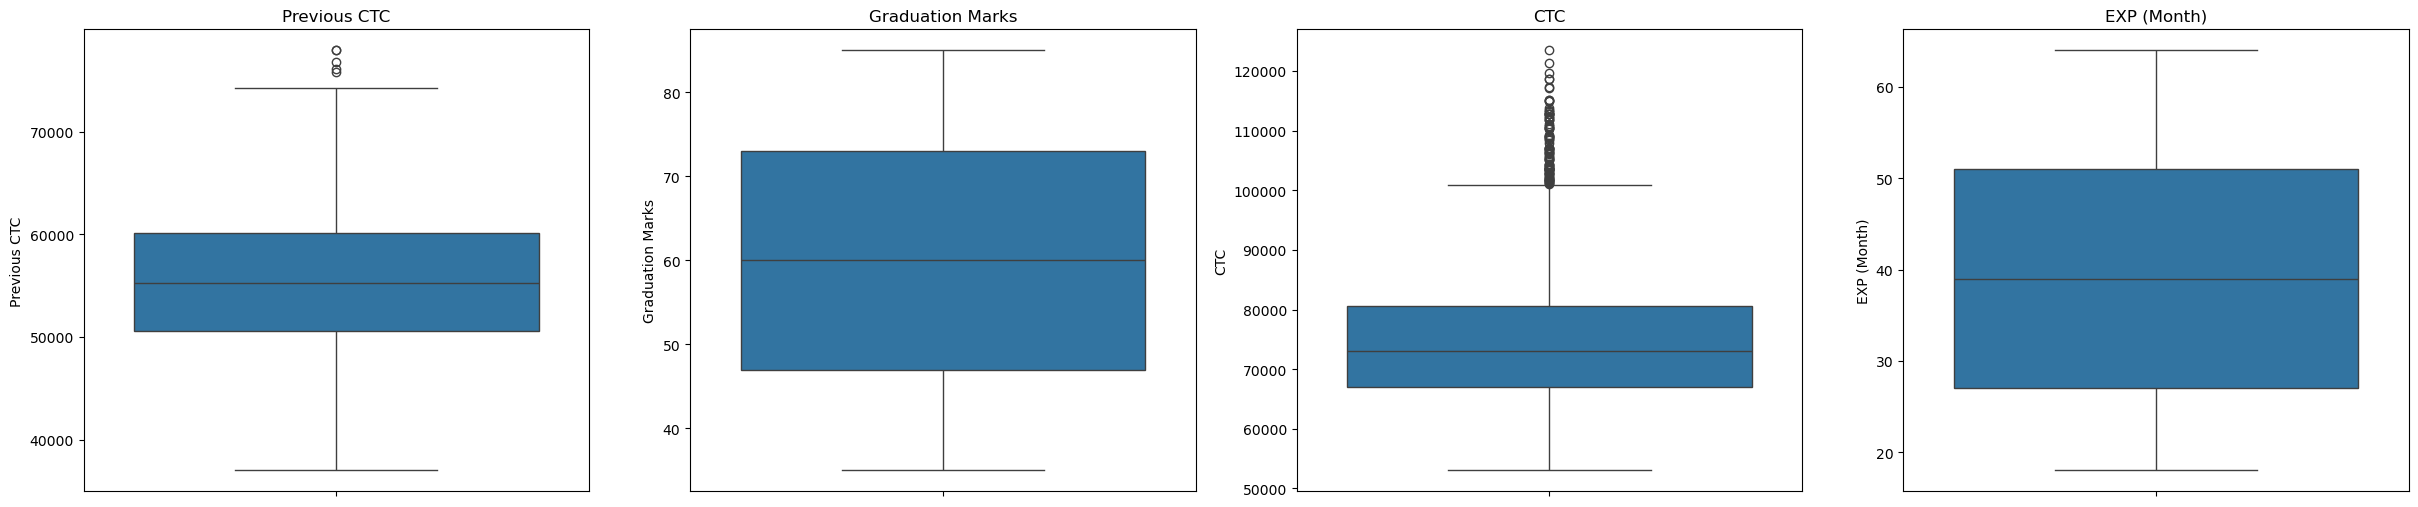

In [325]:
plt.figure(figsize = (30,6))
plt.subplot(1,4,1)
sns.boxplot(df['Previous CTC'])
plt.title('Previous CTC')

plt.subplot(1,4,2)
sns.boxplot(df['Graduation Marks'])
plt.title('Graduation Marks')

plt.subplot(1,4,3)
sns.boxplot(df['CTC'])
plt.title('CTC')

plt.subplot(1,4,4)
sns.boxplot(df['EXP (Month)'])
plt.title('EXP (Month)')
plt.show()

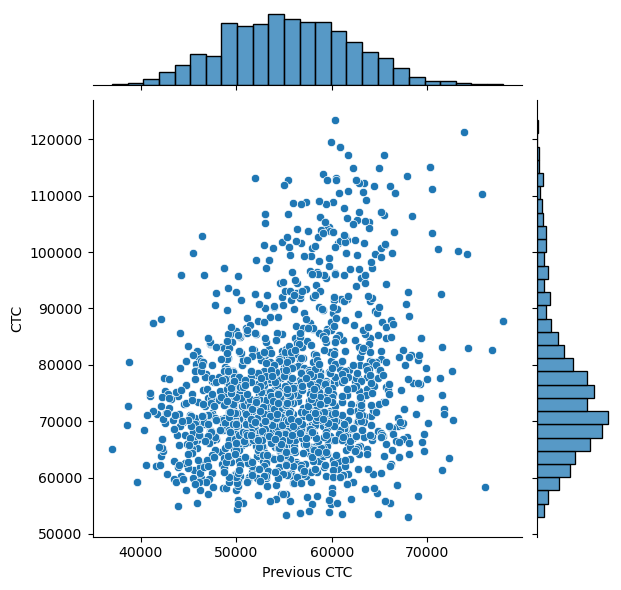

In [327]:
sns.jointplot(x = 'Previous CTC', y = 'CTC', data = df)
plt.show()

#### Removing Outliers

In [329]:
# we will use IQR to detect and remove outliers from the column 'Previous CTC'
Q1 = np.percentile(df['Previous CTC'], 25)
Q3 = np.percentile(df['Previous CTC'], 75)
IQR = Q3 - Q1
print(IQR)

9587.5


In [331]:
# let us now define the upper limit and the lower limit 
upper_limit = Q3 + 1.5*IQR 
lower_limit = Q1 - 1.5*IQR
print(upper_limit,lower_limit)


74505.75 36155.75


In [333]:
# upper bound
upper_limit = Q3 + 1.5*IQR
upper_array = np.array(df['Previous CTC'] >= upper_limit)
print("Upper Bound:", upper_limit)
print('Total Outliers: ',upper_array.sum())
 
# Below Lower bound
lower_limit = Q1-1.5*IQR
lower_array = np.array(df['Previous CTC'] <= lower_limit)
print("\nLower Bound:", lower_limit)
print('Total Outliers: ',lower_array.sum())

Upper Bound: 74505.75
Total Outliers:  5

Lower Bound: 36155.75
Total Outliers:  0


In [335]:
outliers = np.where(df['Previous CTC'] >= upper_limit)[0]
outliers
# Removing the outliers
df1=df.drop(outliers)
df1.shape

(1538, 8)

<Axes: xlabel='Previous CTC'>

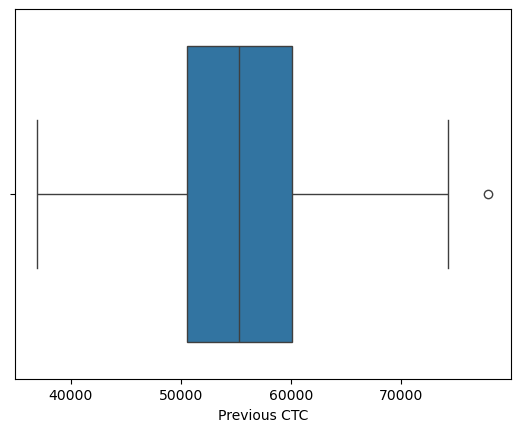

In [337]:
sns.boxplot(x=df1['Previous CTC'])

<Axes: xlabel='CTC'>

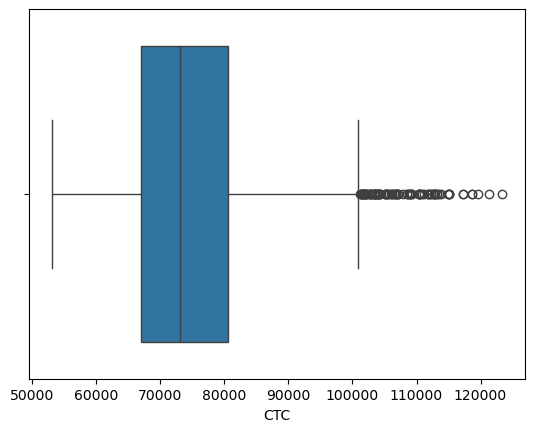

In [339]:
sns.boxplot(x=df['CTC'])

In [341]:
# we will use IQR to detect and remove outliers from the column 'CTC'
Q1_1 = np.percentile(df1['CTC'], 25)
Q3_1 = np.percentile(df1['CTC'], 75)
IQR_1 = Q3_1 - Q1_1
print(IQR_1)

13625.414999999994


In [343]:
# let us now define the upper limit and the lower limit 
upper_limit1 = Q3_1 + 1.5*IQR_1 
lower_limit1 = Q1_1 - 1.5*IQR_1
print(upper_limit1,lower_limit1)

101000.5925 46498.93250000002


In [345]:
# upper bound
upper_limit1 = Q3_1 + 1.5*IQR_1
upper_array1 = np.array(df1['CTC'] >= upper_limit1)
print("Upper Bound:", upper_limit1)
print('Total Outliers: ',upper_array1.sum())
 
# Below Lower bound
lower_limit1 = Q1_1-1.5*IQR
lower_array1 = np.array(df1['CTC'] <= lower_limit1)
print("\nLower Bound:", lower_limit1)
print('Total Outliers: ',lower_array1.sum())

Upper Bound: 101000.5925
Total Outliers:  93

Lower Bound: 52555.80500000001
Total Outliers:  0


In [347]:
df1=df1[((df1['CTC']>lower_limit1) & (df1['CTC']<upper_limit1))]

In [349]:
df1.shape

(1445, 8)

<Axes: xlabel='CTC'>

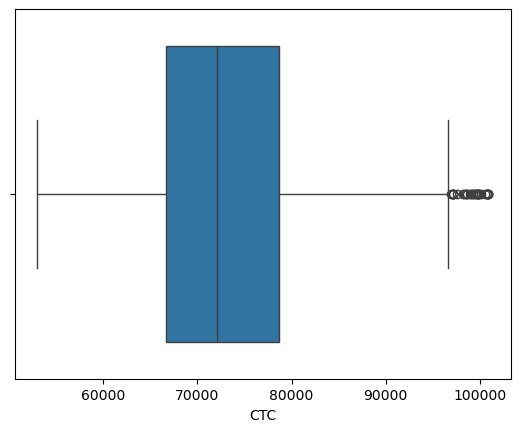

In [351]:
sns.boxplot(x=df1['CTC'])

- Most of the outliers have been removed from both the columns

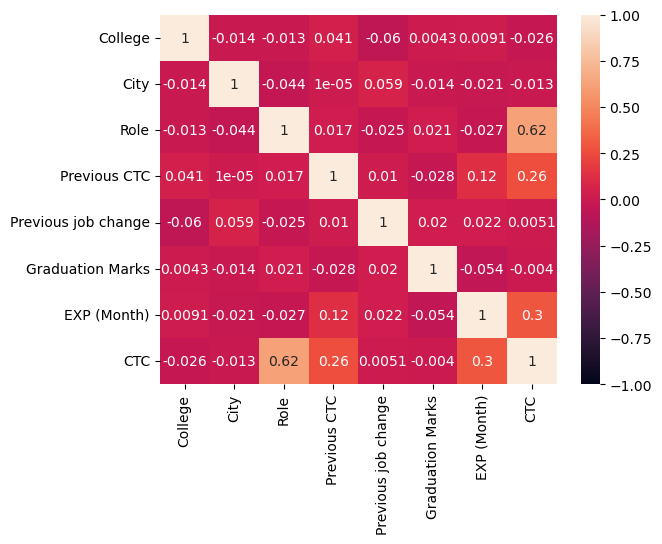

In [353]:
#Calculate the correlation matrix

sns.heatmap(df.corr(numeric_only = True), annot = True, vmin = -1 )
plt.show()

#### Splitting the data into Test and Train

In [355]:
X = df1.drop('CTC',axis=1)
X.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month)
0,2,0,1,55523.0,3,66,19
1,2,0,0,57081.0,1,84,18
2,3,0,0,60347.0,2,52,28
3,3,0,0,49010.0,2,81,33
4,1,0,0,57879.0,4,74,32


In [357]:
y=df1['CTC']
y

0       71406.58
1       68005.87
2       76764.02
3       82092.39
4       73878.10
          ...   
1584    77283.59
1585    68416.86
1586    70186.19
1587    73394.09
1588    70056.31
Name: CTC, Length: 1445, dtype: float64

In [359]:
# dividing the data into test and train 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1000)

In [361]:
X_train.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month)
213,1,0,0,49971.0,2,77,34
595,3,1,0,55675.0,1,46,46
584,3,0,0,48860.0,4,67,19
1145,3,1,0,58582.0,1,68,52
902,3,0,0,54728.0,3,37,26


In [363]:
X_train.shape, X_test.shape

((1156, 7), (289, 7))

#### Normalisation 

- Since we have data of different scales, so in order to get proper fit we have to transform all the data within a range of values. To accomplish this we will now normalize our data..

In [365]:
scaler = StandardScaler() 
X_train_s = scaler.fit_transform(X_train) 
X_test_s = scaler.transform(X_test) 

#### Model Building

In [367]:
# we are considering the following models for our analysis as they are the most common regression models.

models = [LinearRegression(), XGBRegressor(), KNeighborsRegressor(),
          Lasso(), RandomForestRegressor(), Ridge(), DecisionTreeRegressor(),GradientBoostingRegressor()] 

# creating a loop to train each model 
for i in range(8): 
    models[i].fit(X_train_s, y_train) 
  
    print(f'{models[i]} : ') 
  
    train_preds = models[i].predict(X_train_s) 
    print('Training Error : ', mean_squared_error(y_train, train_preds))                # model evaluation
    print(' r2_score :', r2_score(y_train, train_preds))                 # model evaluation through r2_score
  
    test_preds = models[i].predict(X_test_s) 
    print('Test Error : ', mean_squared_error(y_test, test_preds)) 
    print(' r2_score :', r2_score(y_test, test_preds))
    print() 

LinearRegression() : 
Training Error :  57903063.27265213
 r2_score : 0.38203130157804277
Test Error :  61172803.3771915
 r2_score : 0.3588600728064254

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  959943.2329548812
 r2_score : 0.989755034765004
Test Error :  59976073.73348496

#### Hyperparameters

In [369]:
# Parameter grid for GridSearch
params_grid = {
    'max_features': [3, 4, 5, 6],          # Number of features to consider at each split
    'min_samples_split': [2, 4, 6, 9]      # Minimum number of samples required to split a node
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)  # Set random_state for reproducibility

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=params_grid, 
                           cv=5,            # 5-fold cross-validation
                           scoring='r2',    # You can change this metric based on your problem 
                           n_jobs=-1)       # Use all available cores for parallelism

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')

# Use the best estimator to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Testing our model again
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Best Parameters: {'max_features': 4, 'min_samples_split': 6}
Mean Squared Error: 52129887.05789422
R^2 Score: 0.4536370715786211


<h1><center>Thank You!</center></h1>